
# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.




In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
import pandas as pd

In [ ]:
# Load the diabetes dataset
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt",sep="\t")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
len(df)

442

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

Number of Instances: 442

Number of Attributes: First 10 columns are numeric predictive values

Target: Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
- Age
- Sex
- Body mass index
- Average blood pressure
- S1
- S2
- S3
- S4
- S5
- S6

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

In [ ]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [ ]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


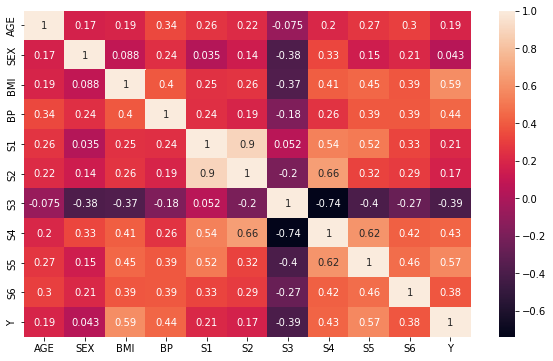

In [ ]:
import seaborn as sns
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.isna().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

There are no missing values in the dataset

In [ ]:
# Use only one feature (bmi)
diabetes_X = df[["BMI"]]
diabetes_y = df[["Y"]]


In [ ]:
# Split the data into training/testing sets

X_train, X_test, y_train, y_test = train_test_split(diabetes_X,diabetes_y,test_size=0.2,random_state=42 )

In [ ]:
y_train.shape

(353, 1)

In [ ]:
y_test.shape

(89, 1)

In [ ]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [ ]:
type(y_test)

pandas.core.frame.DataFrame

In [ ]:
print("X_test - test X")
print(X_test[0:3])
print("y_test - actual")
print(y_test[0:3])
print("y_pred - model")
print(y_pred[0:3])

X_test - test X
      BMI
287  25.8
211  29.8
72   26.0
y_test - actual
       Y
287  219
211   70
72   202
y_pred - model
[[145.80622687]
 [188.85739048]
 [147.95878505]]


In [ ]:
# print coeff and intercept
print(regr.coef_)
print(regr.intercept_)

[[10.7627909]]
[-131.87377836]


In [ ]:
# y = -131.87377836 + 10.7627909BMI 

In [ ]:
BMI = 25
print(f"Your predicted sugar level is {regr.predict([[BMI]])}")

Your predicted sugar level is [[137.19599415]]


In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[10.7627909]]
Mean squared error: 4061.83
Root Mean squared error: 63.73
Variance score: 0.23


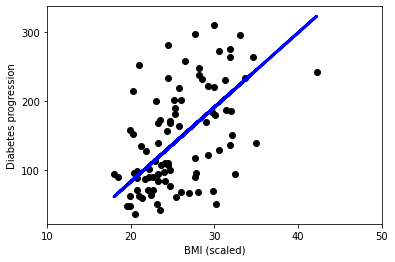

In [ ]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(ticks=[10, 20, 30,40,50])
plt.yticks(ticks=[100, 200, 300])
plt.xlabel("BMI (scaled)")
plt.ylabel("Diabetes progression")
plt.show()

In [ ]:
# exercise - create ML model with 2 features
